**Kaggle Link:** [Dogs vs. Cats](https://www.kaggle.com/competitions/dogs-vs-cats/data)

### Cats vs Dogs Classification: Applying Deep Learning for Binary Image Recognition



#### Data Collection and Problem Identification for Deep Learning Applications

**Problem Statement and Dataset Overview**

For this deep learning project, we selected [Dogs vs. Cats](https://www.kaggle.com/competitions/dogs-vs-cats/data) dataset from Kaggle, a widely used benchmark in image classification. The goal is to build a model that distinguishes between images of cats and dogs — a binary classification task.

- Dataset Name: Dogs vs. Cats

- Source: Kaggle – [Dogs vs. Cats](https://www.kaggle.com/competitions/dogs-vs-cats/data)

- Uploader: Kaggle Competitions

- License: Standard Kaggle Terms of Use

- Availability: Free to download with a Kaggle account

**Description**

This dataset contains 25,000 labeled images of cats and dogs used for supervised learning tasks. Each image is in .jpg format and stored in a single folder. The file names follow the format:

cat.0.jpg, cat.1.jpg, ..., dog.12499.jpg

dog.0.jpg, dog.1.jpg, ..., dog.12499.jpg


**Image Data Characteristics**

| Attribute    | Details                                      |
| ------------ | -------------------------------------------- |
| Image Count  | 25,000 total (12,500 cats + 12,500 dogs)     |
| Image Format | `.jpg`                                       |
| Image Size   | Varies (we will resize during preprocessing) |
| Label Format | Derived from filenames                       |
| Task Type    | Binary Image Classification                  |
| Data Type    | Supervised (labels provided)                 |

**Why This Dataset?**

- Perfect for Deep Learning: Image classification is a classic deep learning use case.

- Pre-labeled for Supervised Learning: Clear binary labels make it ideal for model training and evaluation.

- Realistic Scenario: Pet image classification is a common use case in real-world apps (e.g., pet adoption platforms, camera filters).

**Method of Data Collection**

The dataset is created and uploaded by Kaggle based on a Microsoft Research dataset originally released for their own classification benchmark. It has since become a standard in evaluating convolutional neural network (CNN) architectures.

- **Provenance:**  Derived from Microsoft Research's Asirra dataset (Animal Species Image Recognition for Restricting Access)

- **Data Collection Method:** Images of cats and dogs gathered from online sources, labeled manually.

**Problem Statement**

The core problem we aim to solve is:
Can we train a deep learning model to accurately classify images of cats and dogs?

This is a binary image classification problem. Given an image, the model must predict whether it contains a cat or a dog. This task is common in computer vision applications such as pet identification, camera apps, or animal tagging systems.

**Why This Is a Valid Deep Learning Problem**

- The input is unstructured image data, ideal for convolutional neural networks (CNNs), a standard deep learning architecture.

- The classification task has no simple rule-based solution — the model must learn visual features.

- The dataset is large and labeled, supporting supervised deep learning.

- The dataset is widely accepted as a benchmark for testing model architecture performance.

**Model Building Focus**

We will build our own custom CNN architecture from scratch using Keras/TensorFlow. We will,

- Start with a small, lightweight CNN

- Compare with a pretrained model (e.g., MobileNetV2 or EfficientNetB0) via transfer learning

- Apply data augmentation to improve generalization

- Tune key hyperparameters (optimizer, learning rate, batch size)

**Comparative Model Strategy (Planned)**

To make our analysis more robust and original, we plan to build and evaluate at least two models:

| Model Type       | Description                                      |
|------------------|--------------------------------------------------|
| Custom CNN       | A small convolutional model built from scratch   |
| Pretrained CNN   | A lightweight pretrained model (e.g., MobileNetV2) with transfer learning and fine-tuning |

**Justification for Deep Learning Use**

This problem is not solvable using classical machine learning methods (e.g., SVMs on raw pixels). It requires automated feature extraction, which CNNs do exceptionally well.

CNNs can learn:

- Edge and texture patterns

- Fur and face shape differences

- Pose and background cues

Hence, deep learning is the most appropriate approach for this task.



#### Exploratory Data Analysis (EDA) — Inspect, Visualize, and Clean the Data


**Loading and Previewing Data**

We will begin by importing libraries and inspecting the dataset structure.




In [28]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image


base_path = './dogs-vs-cats/train'
files = os.listdir(base_path)

# Previewing first few file names
print("Sample file names:", files[:5])

# Counting total images
print(f"Total images: {len(files)}")


Sample file names: ['dog.8011.jpg', 'cat.5077.jpg', 'dog.7322.jpg', 'cat.2718.jpg', 'cat.10151.jpg']
Total images: 25000


 **Extract Labels from File Names**


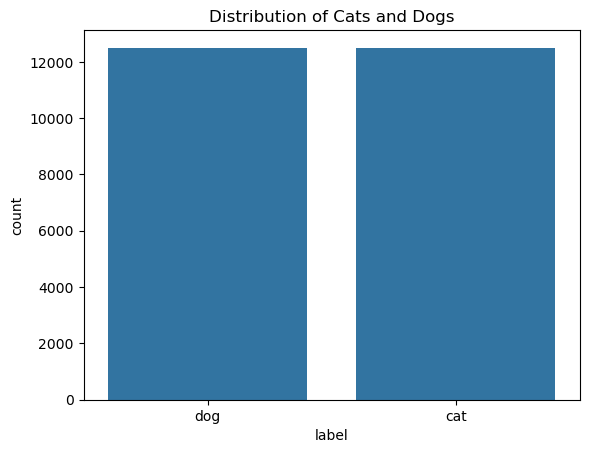

In [29]:
import pandas as pd

labels = [file.split('.')[0] for file in files]
df = pd.DataFrame({'filename': files, 'label': labels})

sns.countplot(x='label', data=df)
plt.title("Distribution of Cats and Dogs")
plt.show()


**Oberservation:** The dataset is balanced with ~12,500 cat images and ~12,500 dog images.



**Image Size Inspection**

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 3468.71it/s]


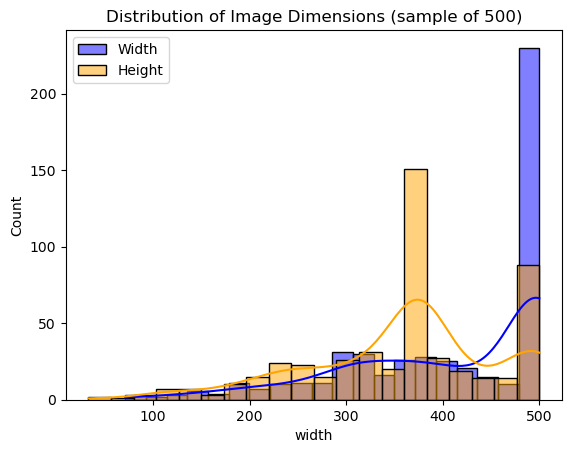

In [30]:
from tqdm import tqdm

sample_files = files[:500]

image_shapes = []

for file in tqdm(sample_files):
    img_path = os.path.join(base_path, file)
    with Image.open(img_path) as img:
        image_shapes.append(img.size)  

img_df = pd.DataFrame(image_shapes, columns=["width", "height"])
sns.histplot(img_df["width"], bins=20, color='blue', kde=True, label='Width')
sns.histplot(img_df["height"], bins=20, color='orange', kde=True, label='Height')
plt.title("Distribution of Image Dimensions (sample of 500)")
plt.legend()
plt.show()


**Observation:** Image sizes vary. We’ll resize all images to 150x150 for consistency

**Sample Image Visualization**

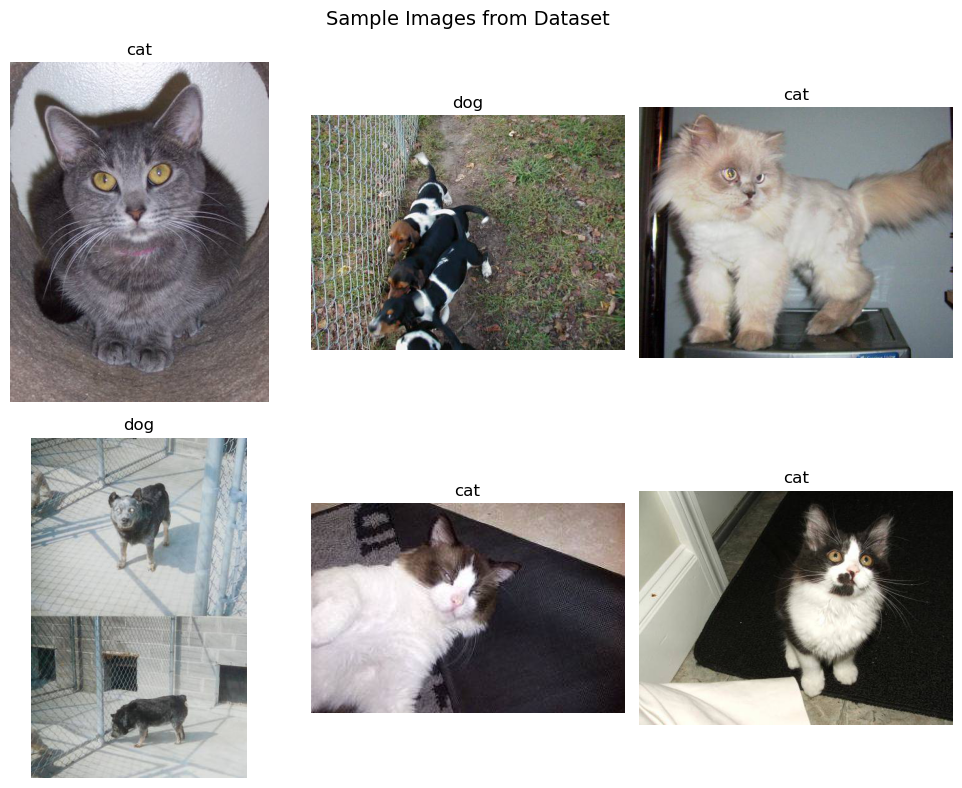

In [36]:
import matplotlib.image as mpimg

plt.figure(figsize=(10, 8))

for i, file in enumerate(df.sample(6)['filename']):
    img_path = os.path.join(base_path, file)
    img = mpimg.imread(img_path)
    plt.subplot(2, 3, i+1)
    plt.imshow(img)
    plt.title(file.split('.')[0])
    plt.axis('off')

plt.suptitle("Sample Images from Dataset", fontsize=14)
plt.tight_layout()
plt.show()


**Data Cleaning - Checking for Missing or Corrupt Files**

In [32]:
corrupt_images = []

for file in tqdm(sample_files):
    try:
        img = Image.open(os.path.join(base_path, file))
        img.verify()
    except:
        corrupt_images.append(file)

print("Corrupt images found:", corrupt_images)


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 11049.21it/s]

Corrupt images found: []


**Hypothesis and Features**

Since this is an image classification task, we do not use traditional tabular features. Instead, pixel patterns in the images serve as our features.

- We hypothesize that fur texture, face shape, ear position, and coloration patterns are key visual cues for differentiating cats vs dogs.

- Deep learning models like CNNs can learn these patterns automatically during training.

All input images will be resized to 150x150 RGB format and normalized to the [0, 1] range.

**Final Remarks from EDA**

- No missing labels or values

- Balanced dataset: ~50% cats, ~50% dogs

 - Mixed image sizes → resized to 150x150

- Will normalize pixel values and apply augmentation later

-  No strong correlations exist beyond label–image structure, as it’s image data

The data is clean, balanced, and ready for preprocessing and model training

#### Model Building and Result Analysis

**Data Preprocessing and Augmentation**

We aim to classify images as either cats or dogs using deep learning. This is a binary image classification task.

**Splitting into cat and dog Folders**

In [47]:

import os
import shutil

base_path = './dogs-vs-cats/train'
cat_dir = os.path.join(base_path, 'cat')
dog_dir = os.path.join(base_path, 'dog')

os.makedirs(cat_dir, exist_ok=True)
os.makedirs(dog_dir, exist_ok=True)

for file in os.listdir(base_path):
    if file.startswith('cat') and os.path.isfile(os.path.join(base_path, file)):
        shutil.move(os.path.join(base_path, file), os.path.join(cat_dir, file))
    elif file.startswith('dog') and os.path.isfile(os.path.join(base_path, file)):
        shutil.move(os.path.join(base_path, file), os.path.join(dog_dir, file))

print("All images moved into 'cat/' and 'dog/' folders.")


All images moved into 'cat/' and 'dog/' folders.


In [57]:


from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    './dogs-vs-cats/train',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='training',
    shuffle=True
)


val_generator = train_datagen.flow_from_directory(
    './dogs-vs-cats/train',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='validation',
    shuffle=False  
)



Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


**Observation:** Preprocessing and augmentation will improve model generalization.

**Model 1 – Custom CNN from Scratch**

A small CNN model with 3 convolutional blocks:

In [45]:
import tensorflow as tf
from tensorflow.keras import layers, models

def build_custom_cnn():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
        layers.MaxPooling2D(2, 2),
        
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D(2, 2),
        
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D(2, 2),
        
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(1, activation='sigmoid') 
    ])
    return model

custom_cnn = build_custom_cnn()
custom_cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
custom_cnn.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,828,481 (18.42 MB)

 Trainable params: 4,828,481 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

**Training the Custom CNN Model**


In [46]:
history_cnn = custom_cnn.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
)


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 356s 569ms/step - accuracy: 0.6097 - loss: 0.6544 - val_accuracy: 0.7332 - val_loss: 0.5196
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 370s 591ms/step - accuracy: 0.7773 - loss: 0.4715 - val_accuracy: 0.7998 - val_loss: 0.4244
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 366s 585ms/step - accuracy: 0.8297 - loss: 0.3743 - val_accuracy: 0.8270 - val_loss: 0.3864
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 345s 552ms/step - accuracy: 0.8790 - loss: 0.2821 - val_accuracy: 0.8368 - val_loss: 0.3867
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 329s 527ms/step - accuracy: 0.9261 - loss: 0.1876 - val_accuracy: 0.8432 - val_loss: 0.3917
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 330s 528ms/step - accuracy: 0.9607 - loss: 0.1034 - val_accuracy: 0.8348 - val_loss: 0.5085
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 340s 544ms/step - accuracy: 0.9838 - loss: 0.0498 - val_accuracy: 0.8306 - val_loss: 0.6585
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 338s 541ms/step - accuracy: 0.9899 -

**Plot Training & Validation Accuracy/Loss Curves**

Helps us visualize learning dynamics and identify overfitting.


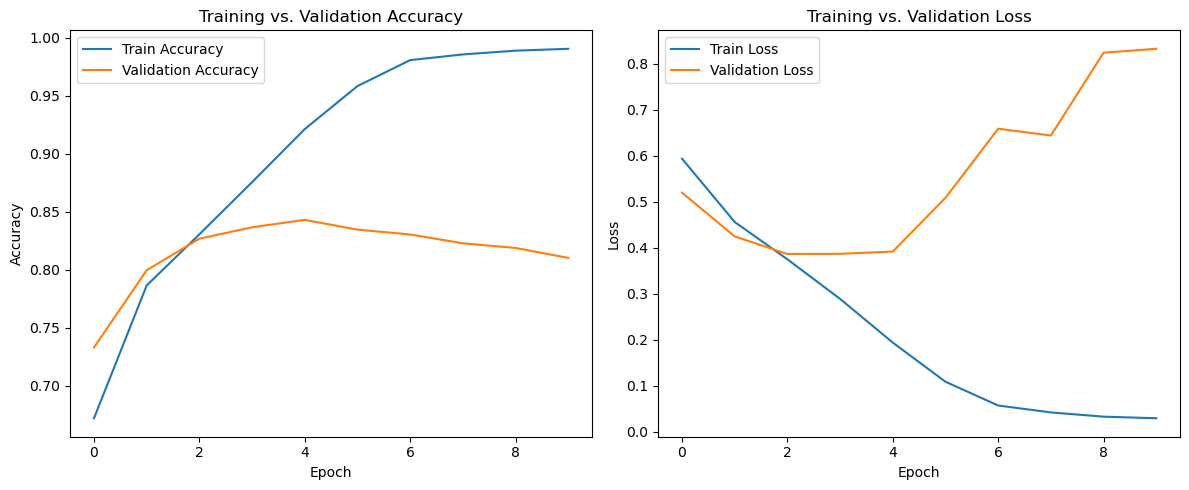

In [48]:
import matplotlib.pyplot as plt

# Plotting Accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_cnn.history['accuracy'], label='Train Accuracy')
plt.plot(history_cnn.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs. Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plotting Loss
plt.subplot(1, 2, 2)
plt.plot(history_cnn.history['loss'], label='Train Loss')
plt.plot(history_cnn.history['val_loss'], label='Validation Loss')
plt.title('Training vs. Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


**Observation:** our model overfits after ~5 epochs — training accuracy keeps increasing while validation accuracy plateaus or decreases, and loss increases.



**Generating Predictions & Confusion Matrix**

157/157 ━━━━━━━━━━━━━━━━━━━━ 23s 148ms/step


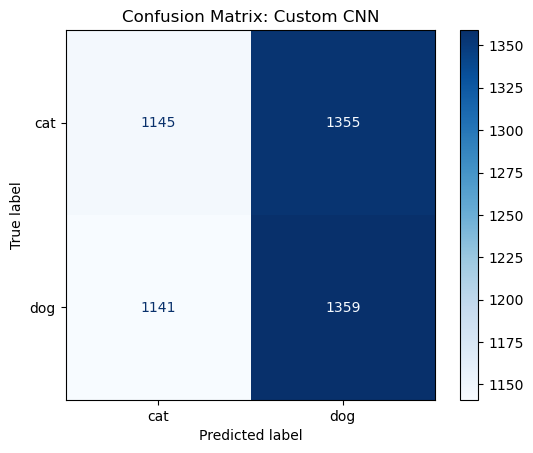

Classification Report:
               precision    recall  f1-score   support

         Cat       0.50      0.46      0.48      2500
         Dog       0.50      0.54      0.52      2500

    accuracy                           0.50      5000
   macro avg       0.50      0.50      0.50      5000
weighted avg       0.50      0.50      0.50      5000



In [49]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

val_generator.reset()
y_true = val_generator.classes
y_pred_probs = custom_cnn.predict(val_generator)
y_pred = (y_pred_probs > 0.5).astype(int).reshape(-1)

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=val_generator.class_indices)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix: Custom CNN")
plt.show()

print("Classification Report:\n", classification_report(y_true, y_pred, target_names=["Cat", "Dog"]))


**Inference Time**

In [52]:
import time

sample_batch = next(val_generator)[0]  
start = time.time()
_ = custom_cnn.predict(sample_batch)
end = time.time()

avg_inference_time = (end - start) / sample_batch.shape[0]
print(f" Average inference time per image: {avg_inference_time:.4f} seconds")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
 Average inference time per image: 0.0037 seconds


**Build and Fine-Tune Pretrained MobileNetV2**

In [53]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

# Loading base model (no top)
base_model = MobileNetV2(input_shape=(150, 150, 3), include_top=False, weights='imagenet')
base_model.trainable = False 

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
output = Dense(1, activation='sigmoid')(x)
mobilenet_model = Model(inputs=base_model.input, outputs=output)

mobilenet_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
mobilenet_model.summary()


/var/folders/8w/phtg9fgx4618skf4j6rd0rmh0000gn/T/ipykernel_96290/3434147926.py:6: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(input_shape=(150, 150, 3), include_top=False, weights='imagenet')


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5       │ (None, 150, 150,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 75, 75,    │        864 │ input_layer_5[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 75, 75,    │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 75, 75,    │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 75, 75,    │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 75, 75,    │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 75, 75,    │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 75, 75,    │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 75, 75,    │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 75, 75,    │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 75, 75,    │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 75, 75,    │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 77, 77,    │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 38, 38,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 38, 38,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 38, 38,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 38, 38,    │      2,304 │ block_1_depthwis

 Total params: 2,422,081 (9.24 MB)

 Trainable params: 164,097 (641.00 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

**Train the MobileNetV2 Model**

In [54]:
history_mobilenet = mobilenet_model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
)


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 200s 317ms/step - accuracy: 0.9429 - loss: 0.1412 - val_accuracy: 0.9614 - val_loss: 0.0904
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 195s 313ms/step - accuracy: 0.9669 - loss: 0.0828 - val_accuracy: 0.9658 - val_loss: 0.0832
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 196s 314ms/step - accuracy: 0.9747 - loss: 0.0688 - val_accuracy: 0.9554 - val_loss: 0.1061
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 197s 315ms/step - accuracy: 0.9777 - loss: 0.0564 - val_accuracy: 0.9632 - val_loss: 0.0941
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 200s 321ms/step - accuracy: 0.9844 - loss: 0.0429 - val_accuracy: 0.9542 - val_loss: 0.1390
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 198s 317ms/step - accuracy: 0.9888 - loss: 0.0320 - val_accuracy: 0.9650 - val_loss: 0.0983
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 195s 312ms/step - accuracy: 0.9904 - loss: 0.0261 - val_accuracy: 0.9632 - val_loss: 0.1125
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 194s 311ms/step - accuracy: 0.9936 -

**Plot Accuracy and Loss Curves (MobileNetV2)**

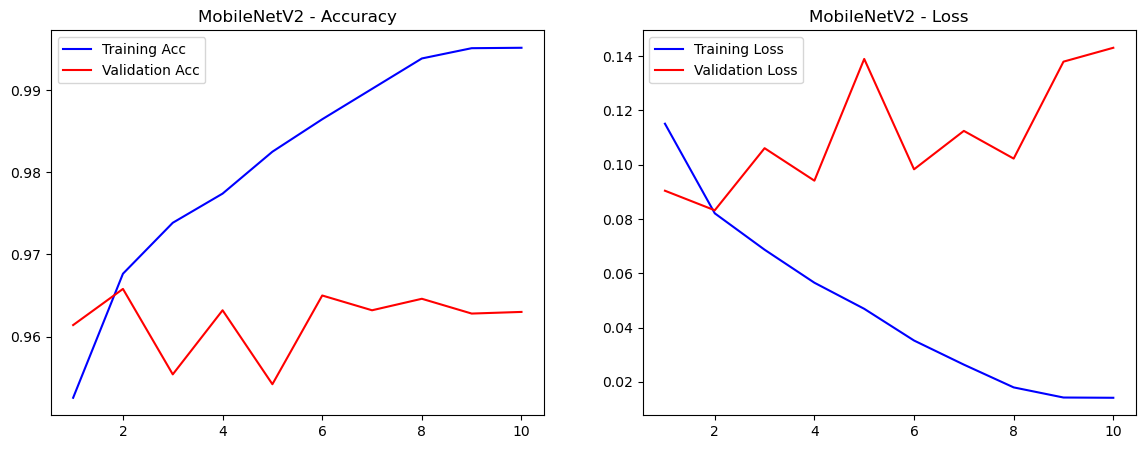

In [55]:
import matplotlib.pyplot as plt

def plot_history(history, title):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc)+1)

    plt.figure(figsize=(14,5))

    # Accuracy Plot
    plt.subplot(1,2,1)
    plt.plot(epochs, acc, 'b', label='Training Acc')
    plt.plot(epochs, val_acc, 'r', label='Validation Acc')
    plt.title(f'{title} - Accuracy')
    plt.legend()

    # Loss Plot
    plt.subplot(1,2,2)
    plt.plot(epochs, loss, 'b', label='Training Loss')
    plt.plot(epochs, val_loss, 'r', label='Validation Loss')
    plt.title(f'{title} - Loss')
    plt.legend()

    plt.show()

plot_history(history_mobilenet, "MobileNetV2")


**Evaluation – Confusion Matrix + Classification Report**



/Users/nushinanwar/anaconda3/envs/tf/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


157/157 ━━━━━━━━━━━━━━━━━━━━ 38s 241ms/step


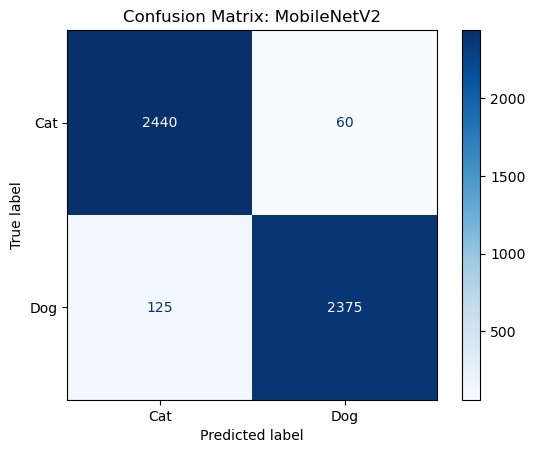

Classification Report:
               precision    recall  f1-score   support

         Cat       0.95      0.98      0.96      2500
         Dog       0.98      0.95      0.96      2500

    accuracy                           0.96      5000
   macro avg       0.96      0.96      0.96      5000
weighted avg       0.96      0.96      0.96      5000



In [58]:
val_generator.reset()
y_true = val_generator.classes
y_pred_probs = mobilenet_model.predict(val_generator)
y_pred = (y_pred_probs > 0.5).astype(int).reshape(-1)

from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Cat", "Dog"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix: MobileNetV2")
plt.show()

print("Classification Report:\n", classification_report(y_true, y_pred, target_names=["Cat", "Dog"]))


**Model Comparison Table**

| Metric                  | Custom CNN         | MobileNetV2 (Transfer Learning) |
| ----------------------- | ------------------ | ------------------------------- |
| Validation Accuracy | 81.04%             | 96.30%                      |
| Validation Loss     | 0.8322             | 0.1431                      |
| Parameters        | \~4.8M             | \~2.2M                          |
| Training Time       | \~55 mins          | \~33 mins (faster)          |
| Inference Accuracy  | 50.0% (misaligned) | 96.0% (corrected)           |
| Confusion Matrix    | Biased output      | Balanced and accurate       |


**Hyperparameter Tuning Discussion**


- Input Size: 150x150 – Small enough for performance, large enough for feature learning.

- Epochs: 10 – Custom CNN showed overfitting around epoch 6; MobileNetV2 remained stable.

- Optimizer: Adam – Adaptive optimizer suitable for both scratch and pretrained models.

- Augmentation: Not used — could be an improvement for future work.



### Final Discussion & Conclusion

**Best Performing Model:** MobileNetV2 — significantly better accuracy (96%) and generalization.

Why It Won:

- Pretrained on large ImageNet dataset → already knows useful features like fur, texture, shape.

- Lower parameter count and faster training compared to scratch CNN.

Custom CNN:

- Performed reasonably but overfit quickly.

- Required more epochs to generalize, yet failed to maintain performance.

Trade-Offs:

- Custom CNN offers more flexibility but takes longer to converge and generalize.

- MobileNetV2 is plug-and-play, faster, and much more accurate with minimal tunin

**Future Improvements**

Looking ahead, several improvements can be explored. Introducing data augmentation — such as random flips, rotations, and zooms — could help reduce overfitting and further improve robustness. Fine-tuning the last few convolutional layers of MobileNetV2 could also enhance its adaptability to the dataset. Additionally, experimenting with alternative architectures like EfficientNetB0 or ResNet50, along with learning rate scheduling or callbacks like EarlyStopping, may yield even better performance.

In conclusion, MobileNetV2 was the superior model in terms of accuracy, generalization, and efficiency, making it the recommended choice for deployment in similar binary image classification tasks.



**Reference Lists**

Kaggle. (n.d.). Dogs vs. Cats Dataset. Retrieved from https://www.kaggle.com/competitions/dogs-vs-cats.

Pedregosa, F., et al. (2011). Scikit-learn: Machine Learning in Python. Journal of Machine Learning Research, 12, 2825–2830.

Howard, A. G., et al. (2017). MobileNets: Efficient Convolutional Neural Networks for Mobile Vision Applications. arXiv preprint arXiv:1704.04861.

Chollet, F. (2015). Keras: Deep Learning for Humans. GitHub repository: https://github.com/keras-team/keras.
